# Traffic Flow Model

### Import Libraries

In [1]:
%matplotlib inline

import numpy 
from matplotlib import pyplot
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from matplotlib import animation
from JSAnimation.IPython_display import display_animation

Applying a conservation law to the vehicle traffic, the traffic density will obey the following transport equation:

$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$

where the flux is given by

$ F = \rho u_{max} (1 - \frac{\rho}{\rho_{max}}) $

Let's say that we are examining a road of length 4 where the speed limit is $u_{max}=1$, fitting 10 cars per unit length $(ρ_{max}=10)$. Now, imagine we have an intersection with a red light at x=2. At the stoplight, traffic is bumper-to-bumper, and the traffic density decreases linearly to zero as we approach the beginning of our road. Ahead of the stoplight, the road is clear. Mathematically, we can represent this situation with the following initial condition:

$
\rho(x,0)=
\begin{cases}
\rho_{max} \frac{x}{2}, &\text{if $ 0 \leq x < 2$}\\
0 &\text{if $ 2 \leq x \leq 4 $}
\end{cases}
$

### Parameters

In [2]:
nx = 81
nt = 30
dx = 4.0/(nx-1)
#
x = numpy.linspace(0,4,nx)
#
rho_max = 10.
u_max = 1.
rho_light = 10.

### Solve

### Initial Conditions

In [3]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    rho = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho[(nx-1)/2:] = 0
    
    return rho

In [4]:
rho = rho_green_light(nx, rho_light)

/Users/Luis/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


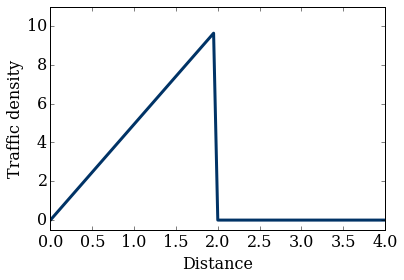

In [5]:
# plot initial conditions

pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

### How does the traffic behave once the light turns green?

Cars should slowly start moving forward: the density profile should move to the right. Let's see if the numerical solution agrees with that! 
Before we start, let's define a function to calculate the traffic flux. We'll use it in each time step of our numerical solution.

In [6]:
#calculate flux:

def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

#### Discretize Equations: Forward in time, backward in space

$ \frac{\rho_{i}^{n+1} - \rho_{i}^{n}}{\Delta t} + \frac{F_{i}^{n} - F_{i-1}^{n}}{\Delta x} = 0  $

In [7]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()

    return rho_n


#### Solve and Animate

In [8]:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)


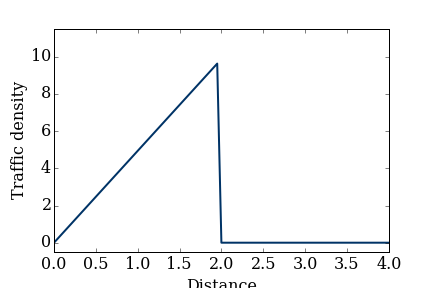
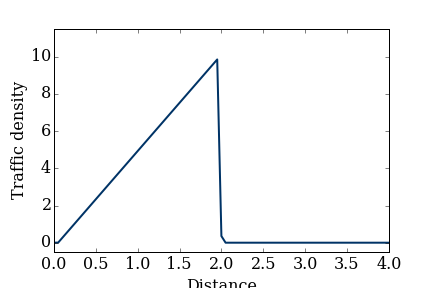
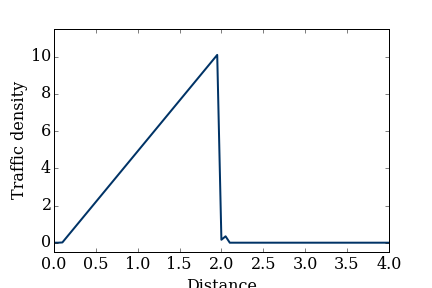
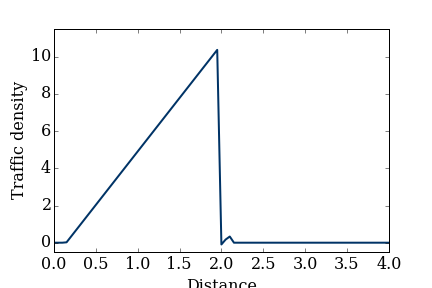
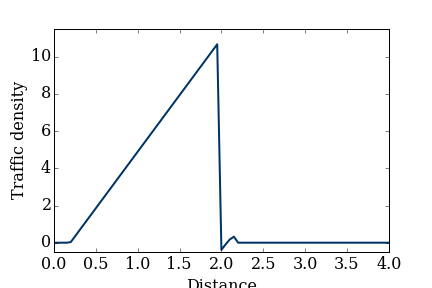
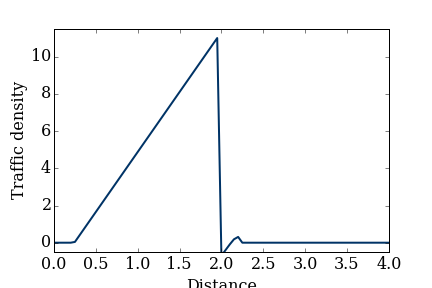
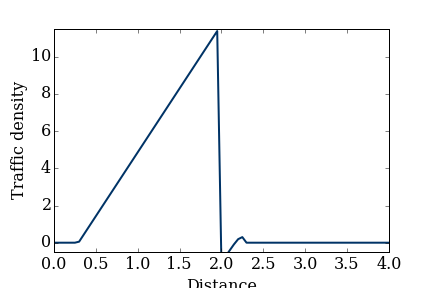
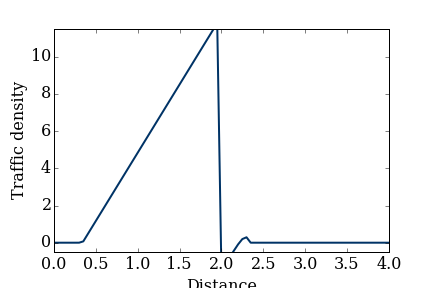
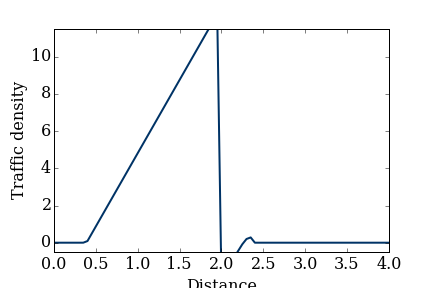
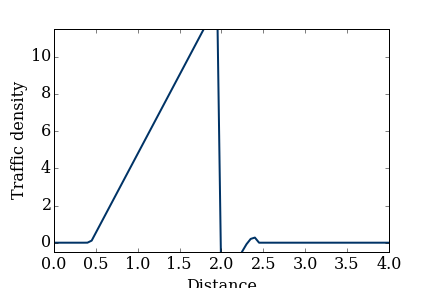
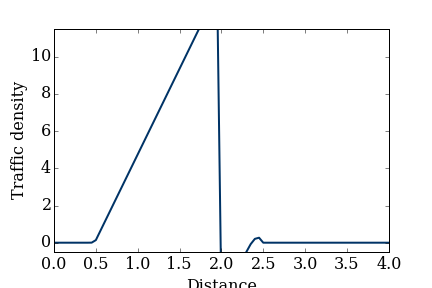
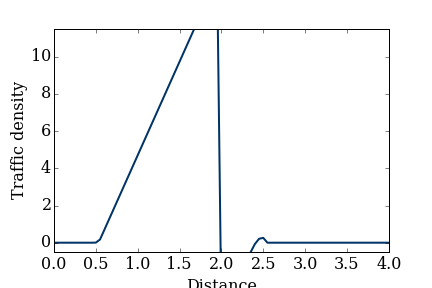
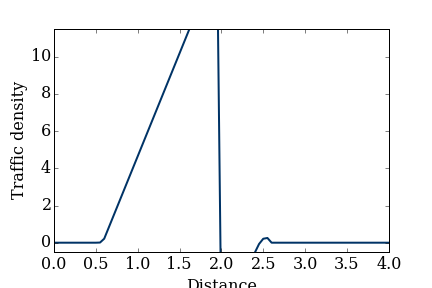
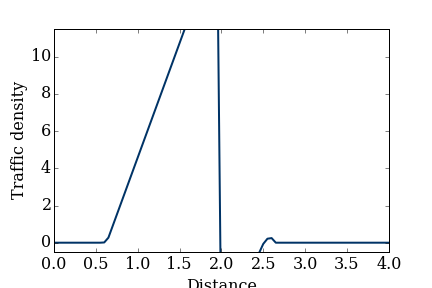
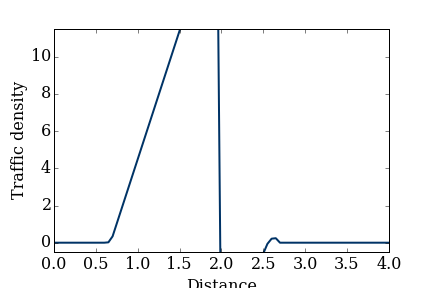
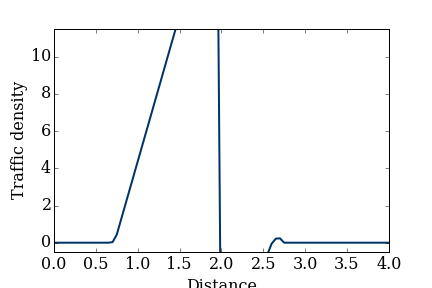
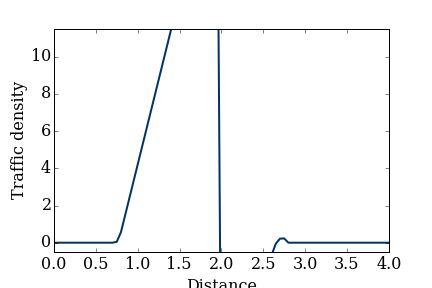
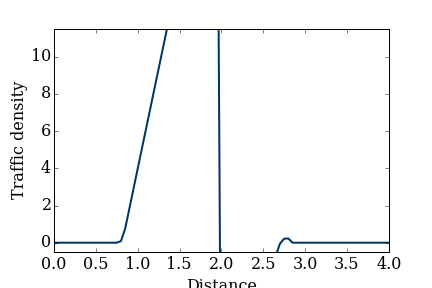
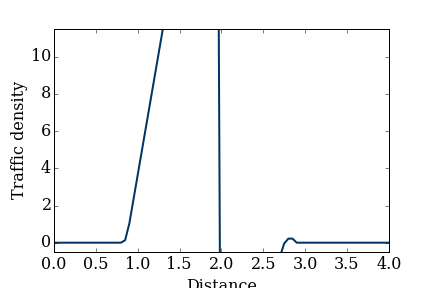
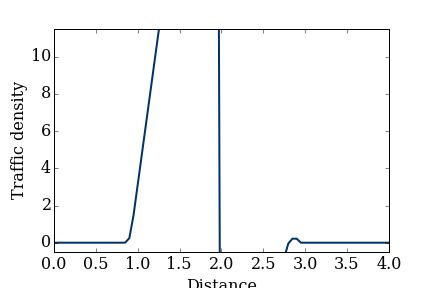
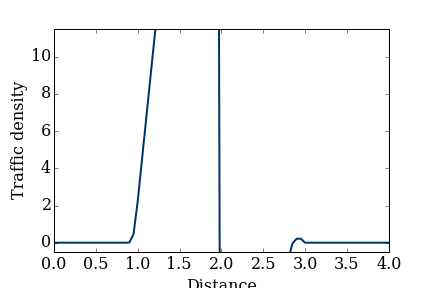
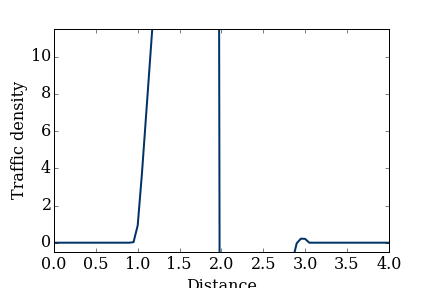
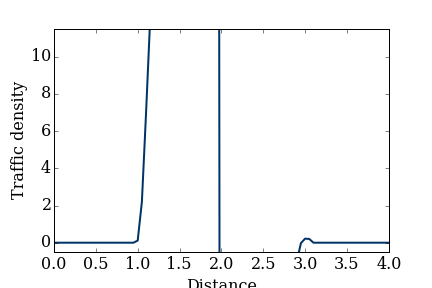
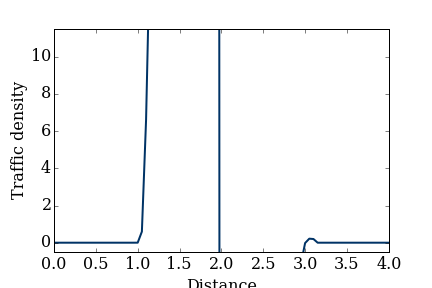
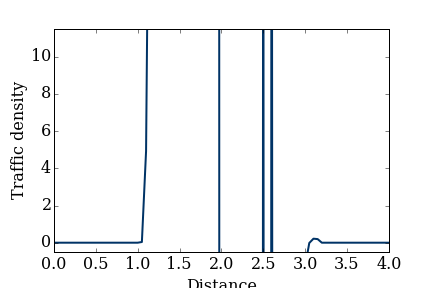
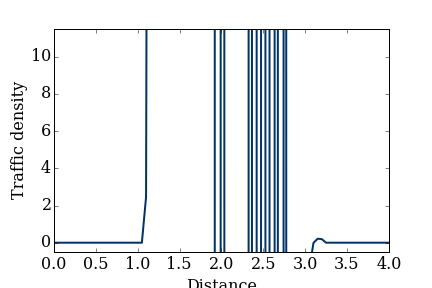
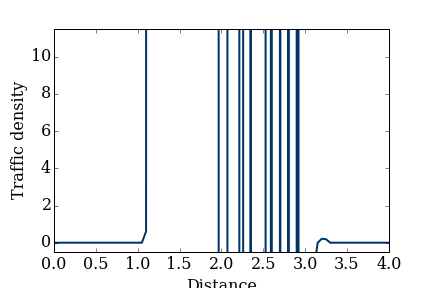
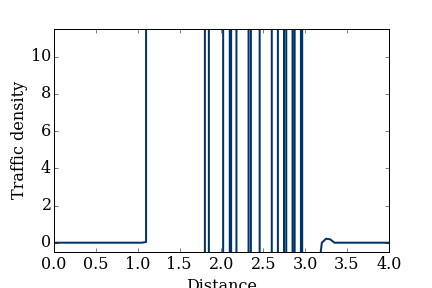
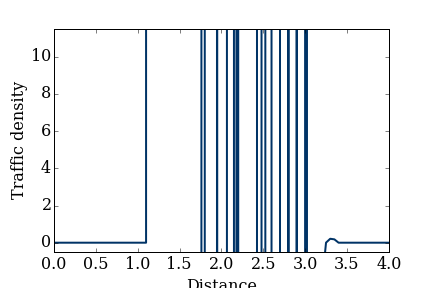
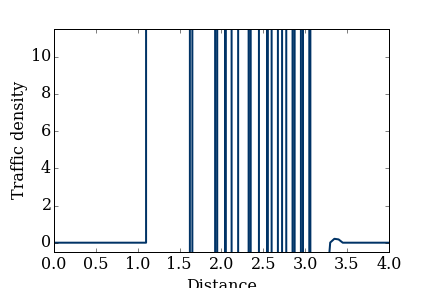

In [9]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

#### The solution blows up! Read up on upwind schemes and see how changing initial conditions leads to a stable solution. Additionally, other discetization schemes allow for a better analysis of this equation

In [10]:
rho_light = 5.
nt = 40

#### Change initial conditions:

$
\rho(x,0)=
\begin{cases}
2.5x, &\text{if $ 0 \leq x < 2$}\\
0 &\text{if $ 2 \leq x \leq 4 $}
\end{cases}
$

In [12]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    rho = numpy.arange(nx)*2./nx*2.5  # Before stoplight
    rho[(nx-1)/2:] = 0
    
    return rho

/Users/Luis/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



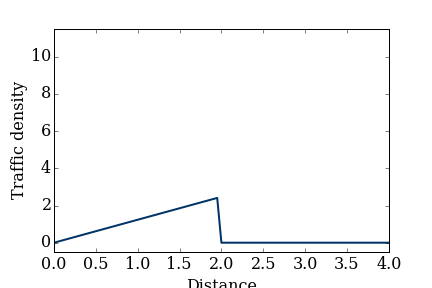
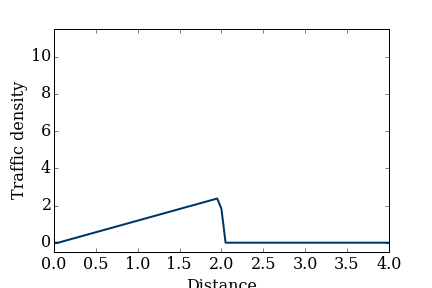
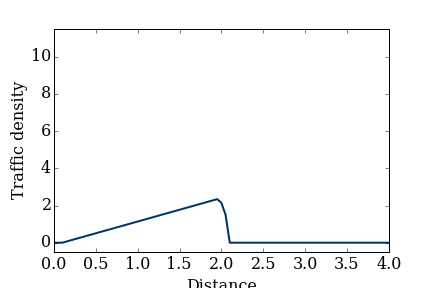
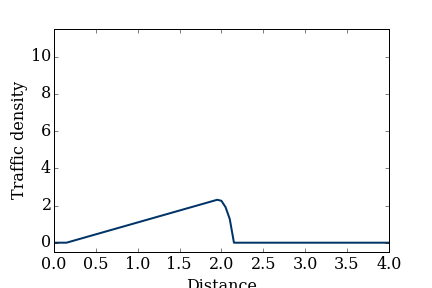
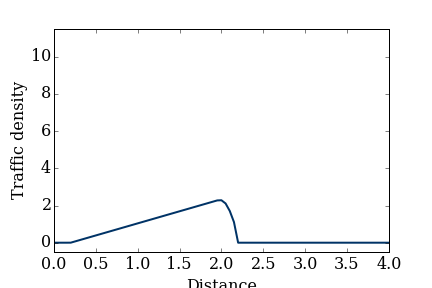
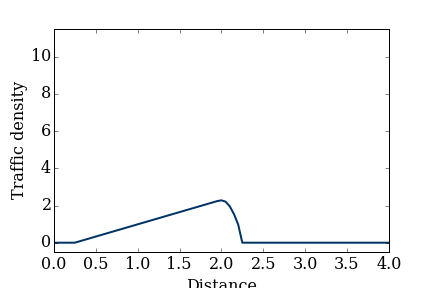
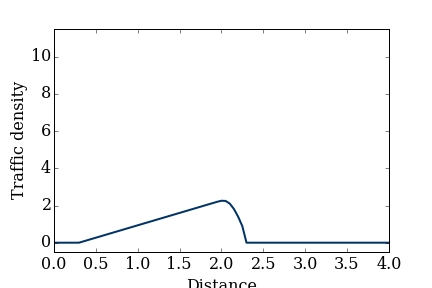
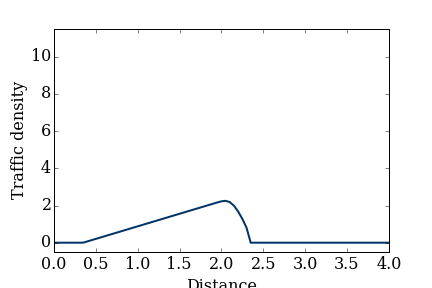
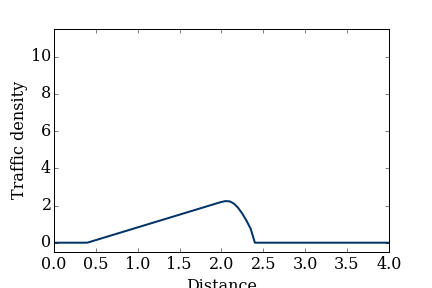
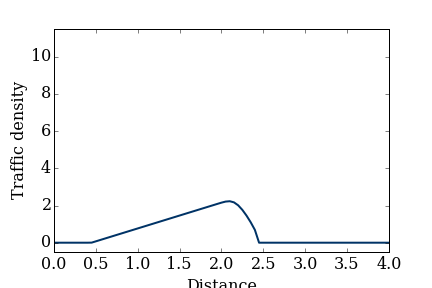
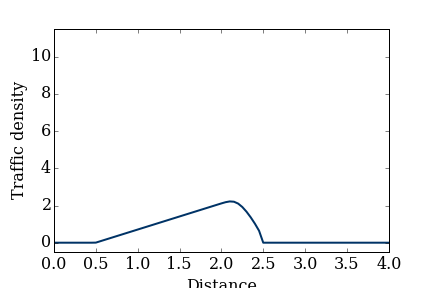
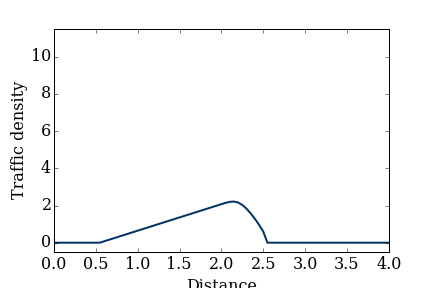
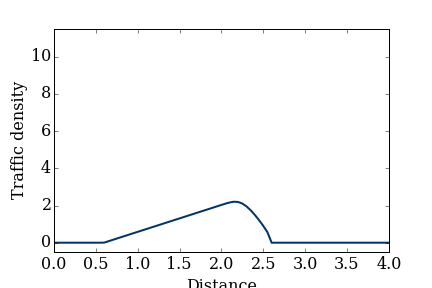
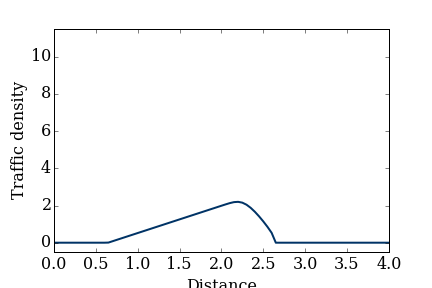
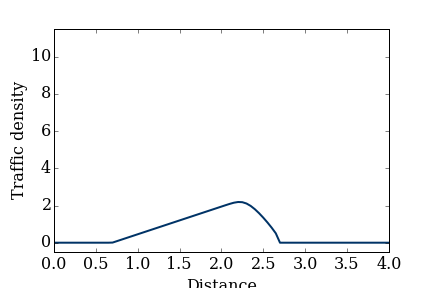
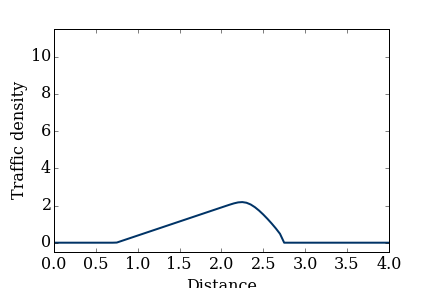
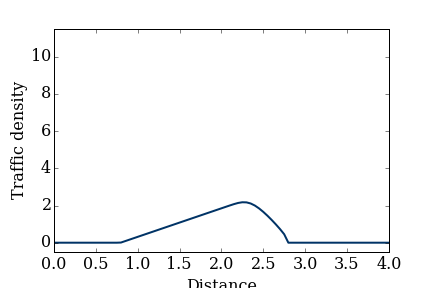
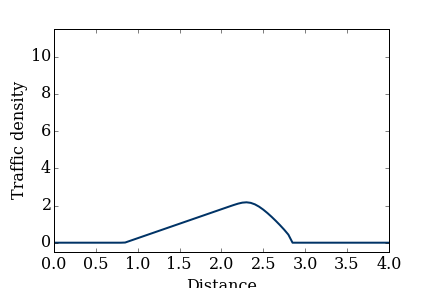
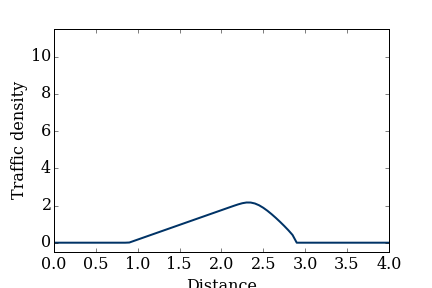
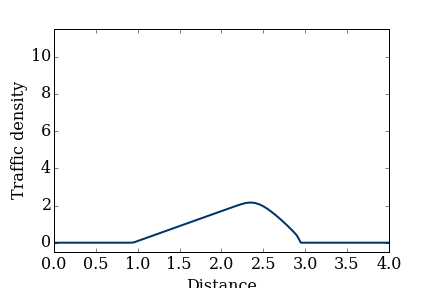
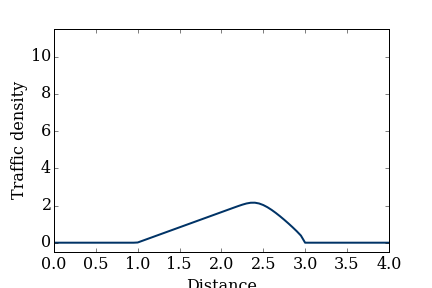
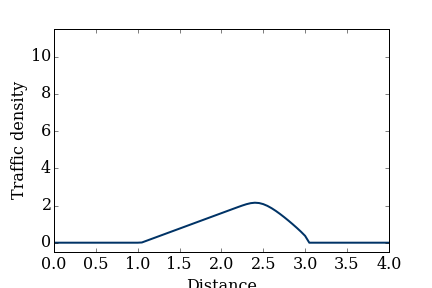
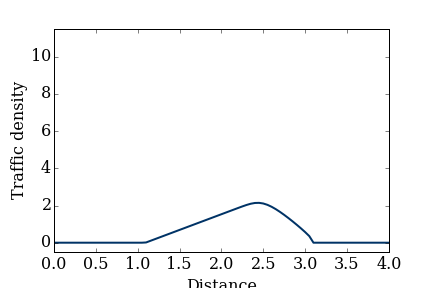
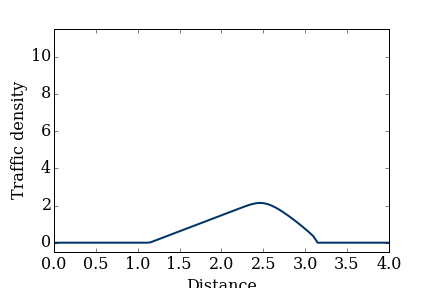
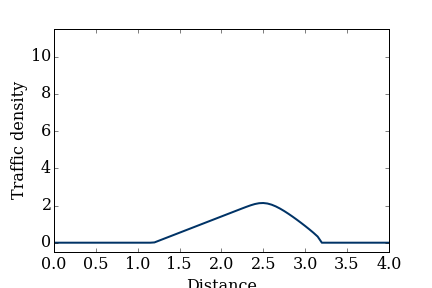
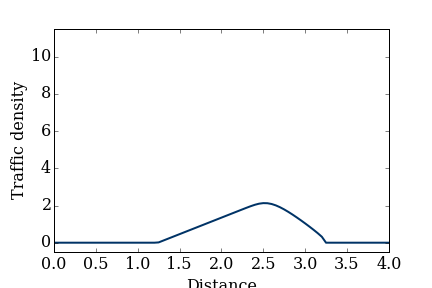
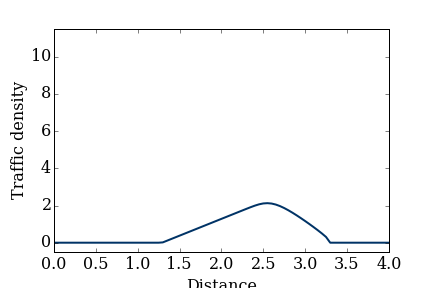
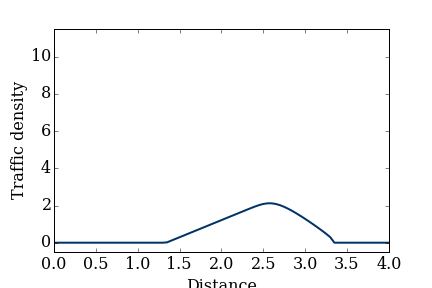
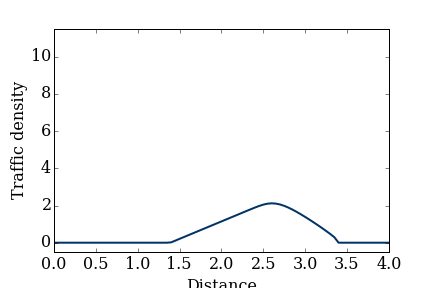
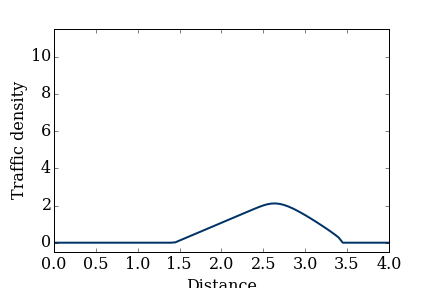
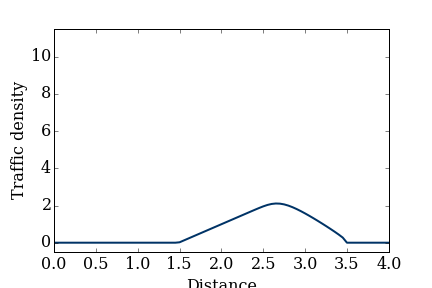
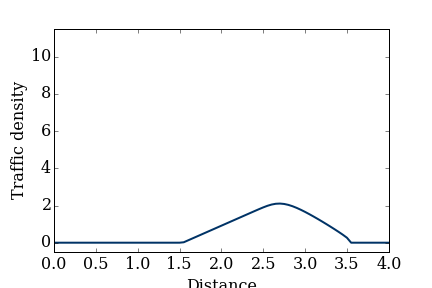
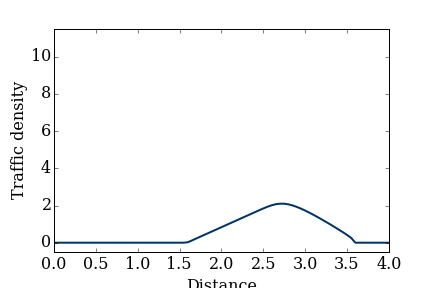
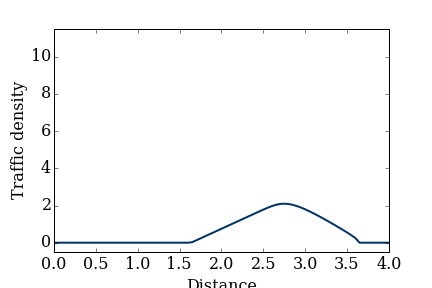
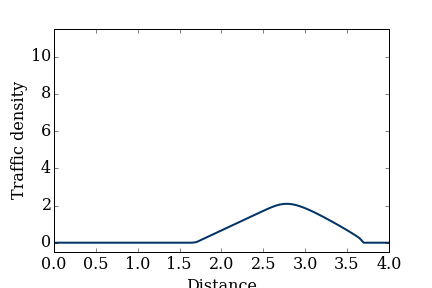
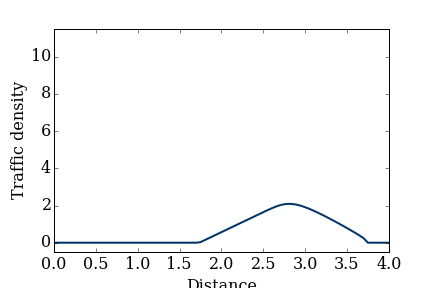
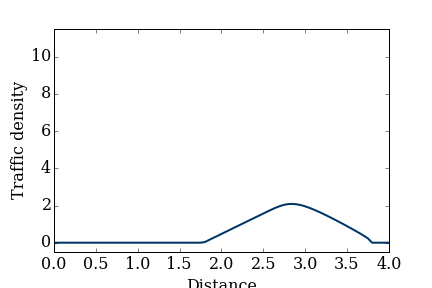
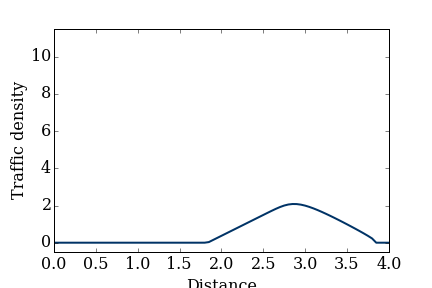
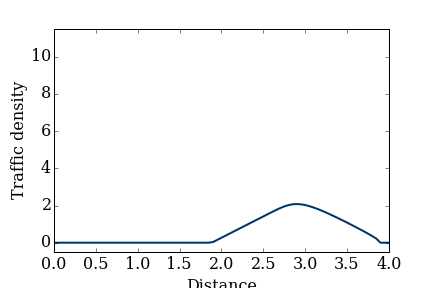
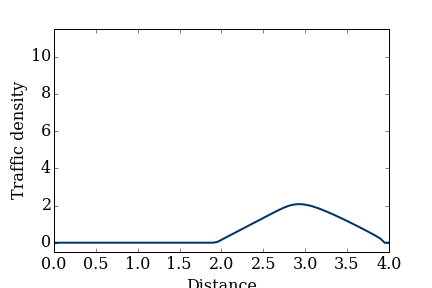

In [13]:

rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')